Q1. Principal component analysis
- (a) Perform PCA on SVHN data set. Find how many top eigenvectors are required to keep
the proportion of variance above 0.9. Plot PoV against number of eigenvectors.
- (b) Visualize top 10 eigenvectors and provide reconstruction of 10 SVHN samples (one
from each class) using top 10 eigenvectors.
- (c) Run k-NN (for k=5 and k=7) on raw data and data obtained after PCA dimensionality
reduction for dimension as found in part (a) and for dimension 10 as in part (b). Provide
the accuracy of the predictions on the test data set for these various cases and discuss
your observations.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


In [3]:
# Data loading
train=scipy.io.loadmat('/content/drive/MyDrive/train_32x32.mat')
test=scipy.io.loadmat('/content/drive/MyDrive/test_32x32.mat')

In [4]:
# data reshape and select the each class 2500 samples
train1 = pd.DataFrame(train['X'].reshape(3072, -1).T)
train1['y'] = pd.DataFrame(train['y'].reshape(train['y'].shape[0],).T)
selected_indices = np.concatenate([train1[train1['y']==i+1][:2500].index for i in range(10)])
x_train = train1.drop('y',axis=1)
y_train = train1['y']
x_train=(x_train.iloc[selected_indices]).to_numpy()
y_train=(y_train.iloc[selected_indices]).to_numpy()
x_train,y_train


(array([[ 33,  30,  38, ..., 103, 106,  79],
        [ 70,  69,  78, ...,  40,  36,  36],
        [ 98,  70,  67, ..., 179, 190, 181],
        ...,
        [144, 142, 164, ..., 120, 122, 136],
        [152, 173, 190, ..., 119, 109,  99],
        [111,  95, 106, ..., 108,  83,  78]], dtype=uint8),
 array([ 1,  1,  1, ..., 10, 10, 10], dtype=uint8))

In [5]:
#train1

In [6]:
#train1[train1['y']==1].sample(2500).index
#train1[train1['y']==1][:2500].index

In [7]:
#selected_indices = np.concatenate([train1[train1['y']==i+1].sample(2500).index for i in range(10)])
#selected_indices = np.concatenate([train1[train1['y']==i+1][:2500].index for i in range(10)])

#len(selected_indices)

In [8]:
"""x_train = train1.drop('y',axis=1)
y_train = train1['y']
x_train=(x_train.iloc[selected_indices]).to_numpy()
y_train=(y_train.iloc[selected_indices]).to_numpy()
x_train,y_train"""

"x_train = train1.drop('y',axis=1)\ny_train = train1['y']\nx_train=(x_train.iloc[selected_indices]).to_numpy()\ny_train=(y_train.iloc[selected_indices]).to_numpy()\nx_train,y_train"

In [9]:
#x_train.iloc[[0,1,2]],y_train.iloc[[0,1,2]]

In [10]:
# standard scaling
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_train)

In [11]:
# perform pca
pca = PCA()
x_train_pca=pca.fit_transform(x_standardized)

In [12]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_eigenvectors_required = np.argmax(cumulative_variance_ratio >= 0.9) + 1

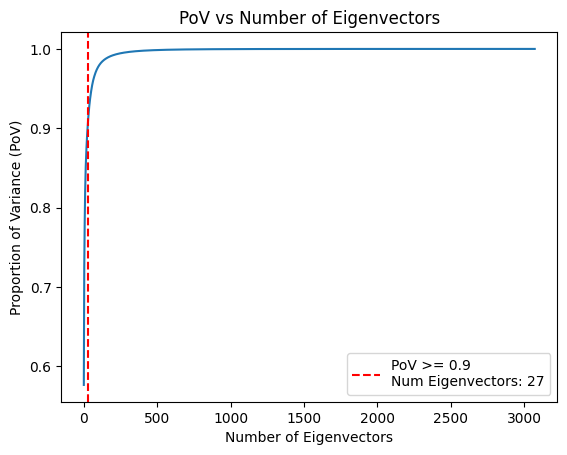

In [13]:
# plot eigenvectors
plt.plot(cumulative_variance_ratio)
plt.axvline(x=num_eigenvectors_required, color='r', linestyle='--', label=f'PoV >= 0.9\nNum Eigenvectors: {num_eigenvectors_required}')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Proportion of Variance (PoV)')
plt.legend()
plt.title('PoV vs Number of Eigenvectors')
plt.show()


In [14]:
#x_train_pca.shape

In [15]:
#top_eigenvectors=pca.components_[0:27]
#top_eigenvectors

In [16]:
#x_train

In [17]:
#x_train[0]

In [18]:
#train['X'][0]

1B)

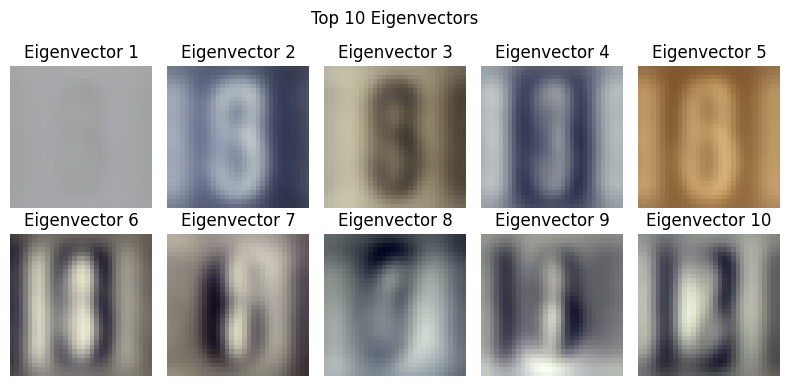

In [19]:
# Visualize top 10 eigenvectors
top_eigenvectors=pca.components_[0:10]
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
top_eigenvectors_scaled = (top_eigenvectors - top_eigenvectors.min()) / (top_eigenvectors.max() - top_eigenvectors.min())
#top_eigenvectors_scaled=scaler.transform(top_eigenvectors)
for i, ax in enumerate(axes.flatten()):
    ax.imshow((top_eigenvectors_scaled[i]).reshape(32,32 ,3))
    ax.axis('off')
    ax.set_title(f'Eigenvector {i+1}')

plt.suptitle('Top 10 Eigenvectors')
plt.tight_layout()
plt.show()


In [20]:
pca_10 = PCA(n_components=10)
x_train_pca_10=pca_10.fit_transform(x_standardized)

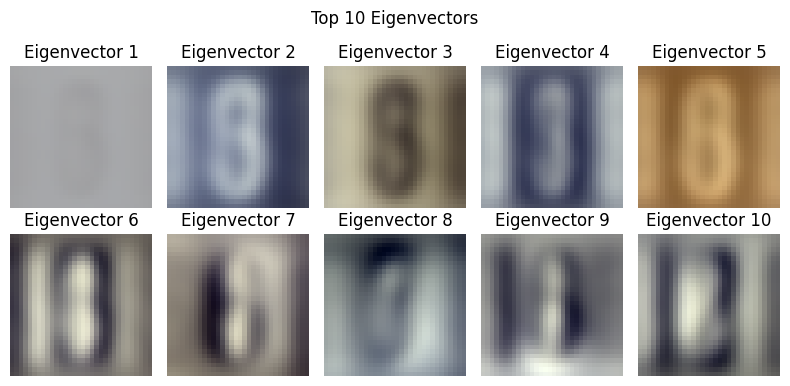

In [21]:

top_eigenvectors = pca_10.components_
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
top_eigenvectors_scaled = (top_eigenvectors - top_eigenvectors.min()) / (top_eigenvectors.max() - top_eigenvectors.min())
#top_eigenvectors_scaled=scaler.transform(top_eigenvectors)
for i, ax in enumerate(axes.flatten()):
    ax.imshow((top_eigenvectors_scaled[i]).reshape(32,32 ,3))
    ax.axis('off')
    ax.set_title(f'Eigenvector {i+1}')

plt.suptitle('Top 10 Eigenvectors')
plt.tight_layout()
plt.show()


In [22]:
#x_train[np.where(y_train ==  1)[0][0]].reshape(1,-1)

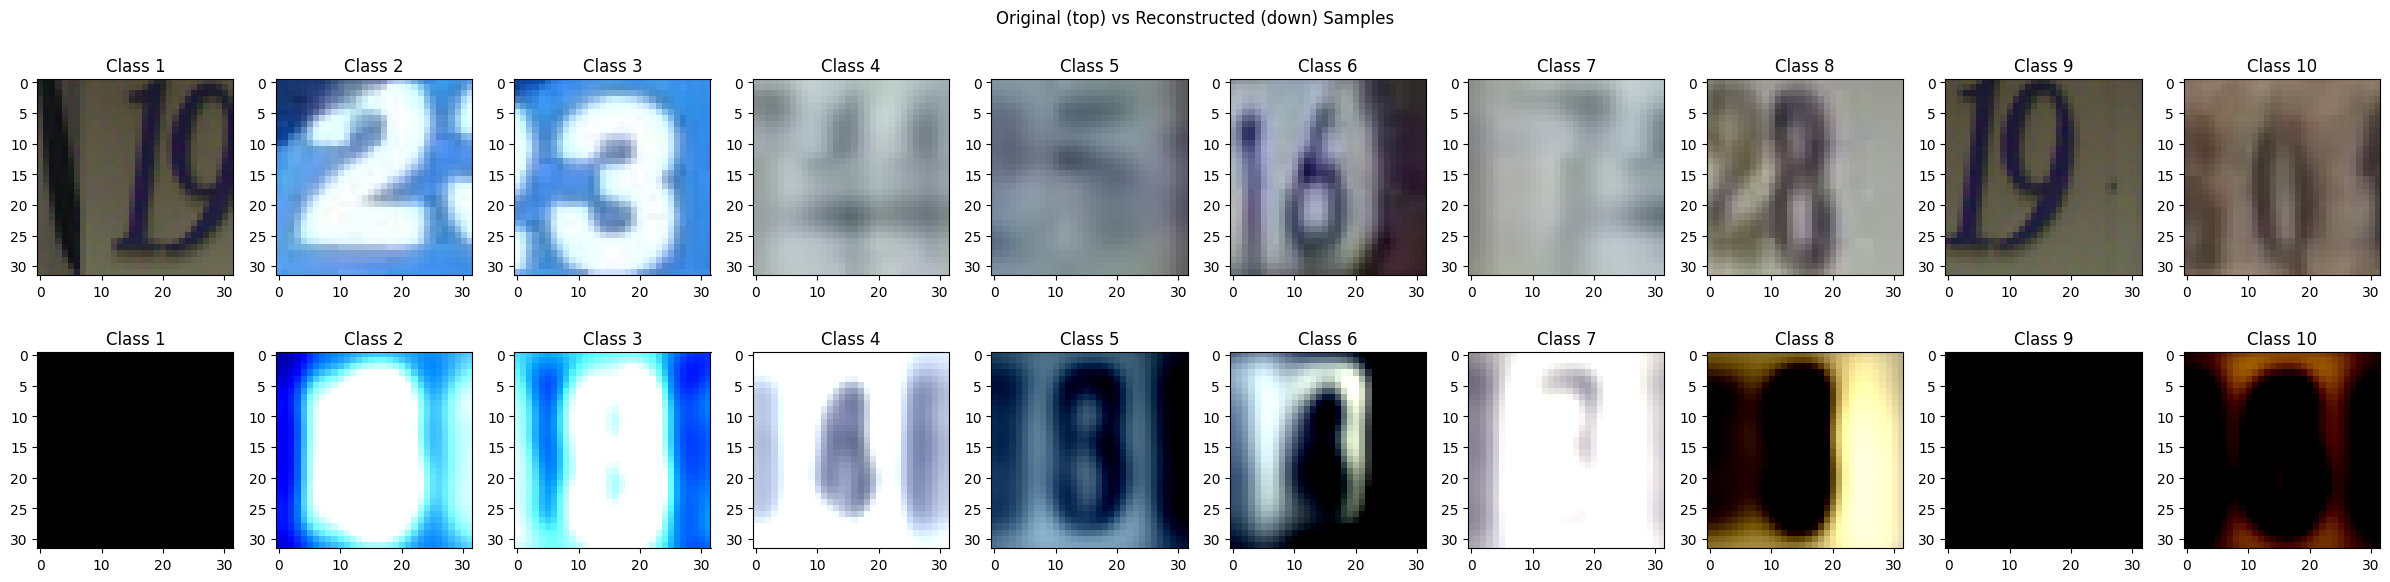

In [23]:
# Reconstruct samples from each class using the top 10 eigenvectors
fig, axes = plt.subplots(2, 10, figsize=(24, 6))
for class_label in range(10):
    # Find an example from each class
    sample_index = np.where(y_train == class_label + 1)[0][0]

    # Standardize and apply PCA to the sample
    sample_standardized = scaler.transform(x_train.T[:, sample_index].reshape(1, -1))
    sample_pca = pca_10.transform(sample_standardized)

    # Reconstruct the sample using the top 10 eigenvectors
    reconstructed_sample = pca_10.inverse_transform(sample_pca)

    # Reshape the reconstructed sample to (32, 32, 3)
    reconstructed_sample = reconstructed_sample.reshape(32, 32, 3)

     #axes[0, i].imshow(X_train[i].reshape(32, 32, 3))
    # Plot the original and reconstructed samples

    axes[0, class_label % 10].set_title(f'Class {class_label + 1}')
    axes[0, class_label % 10].imshow(x_train.T[:, sample_index].reshape(32, 32, 3))
    axes[1, class_label % 10].set_title(f'Class {class_label + 1}')
    axes[1, class_label % 10].imshow(reconstructed_sample)



plt.suptitle('Original (top) vs Reconstructed (down) Samples')
plt.tight_layout()
plt.show()

1C)

In [24]:
x_test = test['X'].reshape(3072, -1).T
y_test=test['y'].ravel()

In [25]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)


In [26]:
# Perform PCA with the number  in part (a)
pca_27 = PCA(n_components=27)  # Assuming num_components is calculated in part (a)
x_train_pca_27 = pca_27.fit_transform(x_train_std)
x_test_pca_27 = pca_27.transform(x_test_std)


In [27]:
# (b) Perform PCA with dimension 10
pca_10 = PCA(n_components=10)
x_train_pca_10 = pca_10.fit_transform(x_train_std)
x_test_pca_10 = pca_10.transform(x_test_std)


In [28]:
# KNN-5
knn_5=KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train_std,y_train)
ypred_train_knn_5=knn_5.predict(x_train_std)
ypred_test_knn_5=knn_5.predict(x_test_std)

In [29]:
# KNN -5 with pca 27
knn_5_pca_27=KNeighborsClassifier(n_neighbors=5)
knn_5_pca_27.fit(x_train_pca_27,y_train)
ypred_train_knn_5_pca_27=knn_5_pca_27.predict(x_train_pca_27)
ypred_test_knn_5_pca_27=knn_5_pca_27.predict(x_test_pca_27)

In [30]:
# KNN -5 with pca -10
knn_5_pca_10=KNeighborsClassifier(n_neighbors=5)
knn_5_pca_10.fit(x_train_pca_10,y_train)
ypred_train_knn_5_pca_10=knn_5_pca_10.predict(x_train_pca_10)
ypred_test_knn_5_pca_10=knn_5_pca_10.predict(x_test_pca_10)

In [31]:
# KNN-7
knn_7=KNeighborsClassifier(n_neighbors=7)
knn_7.fit(x_train_std,y_train)
ypred_train_knn_7=knn_7.predict(x_train_std)
ypred_test_knn_7=knn_7.predict(x_test_std)

In [32]:
# KNN -7 with pca 27
knn_7_pca_27=KNeighborsClassifier(n_neighbors=7)
knn_7_pca_27.fit(x_train_pca_27,y_train)
ypred_train_knn_7_pca_27=knn_7_pca_27.predict(x_train_pca_27)
ypred_test_knn_7_pca_27=knn_7_pca_27.predict(x_test_pca_27)

In [33]:
# KNN -7 with pca -10
knn_7_pca_10=KNeighborsClassifier(n_neighbors=7)
knn_7_pca_10.fit(x_train_pca_10,y_train)
ypred_train_knn_7_pca_10=knn_7_pca_10.predict(x_train_pca_10)
ypred_test_knn_7_pca_10=knn_7_pca_10.predict(x_test_pca_10)

In [34]:
print("knn with 5 neighbors train accuracy:",accuracy_score(y_train,ypred_train_knn_5))
print("knn with 5 neighbors test accuracy:",accuracy_score(y_test,ypred_test_knn_5))

print("knn with 5 neighbors with 27 pca train accuracy:",accuracy_score(y_train,ypred_train_knn_5_pca_27))
print("knn with 5 neighbors with 27 pca test accuracy:",accuracy_score(y_test,ypred_test_knn_5_pca_27))

print("knn with 5 neighbors with 10 pca train accuracy:",accuracy_score(y_train,ypred_train_knn_5_pca_10))
print("knn with 5 neighbors with 10 pca test accuracy:",accuracy_score(y_test,ypred_test_knn_5_pca_10))

print("knn with 7 neighbors train accuracy:",accuracy_score(y_train,ypred_train_knn_7))
print("knn with 7 neighbors test accuracy:",accuracy_score(y_test,ypred_test_knn_7))

print("knn with 7 neighbors with 27 pca train accuracy:",accuracy_score(y_train,ypred_train_knn_7_pca_27))
print("knn with 7 neighbors with 27 pca test accuracy:",accuracy_score(y_test,ypred_test_knn_7_pca_27))

print("knn with 7 neighbors with 10 pca train accuracy:",accuracy_score(y_train,ypred_train_knn_7_pca_10))
print("knn with 7 neighbors with 10 pca test accuracy:",accuracy_score(y_test,ypred_test_knn_7_pca_10))

knn with 5 neighbors train accuracy: 0.63756
knn with 5 neighbors test accuracy: 0.40761370620774434
knn with 5 neighbors with 27 pca train accuracy: 0.633
knn with 5 neighbors with 27 pca test accuracy: 0.4068454210202827
knn with 5 neighbors with 10 pca train accuracy: 0.49456
knn with 5 neighbors with 10 pca test accuracy: 0.25653042409342347
knn with 7 neighbors train accuracy: 0.61016
knn with 7 neighbors test accuracy: 0.4165258143822987
knn with 7 neighbors with 27 pca train accuracy: 0.60384
knn with 7 neighbors with 27 pca test accuracy: 0.4171788567916411
knn with 7 neighbors with 10 pca train accuracy: 0.4602
knn with 7 neighbors with 10 pca test accuracy: 0.26878457283343576


Q2. K-Means clustering
- (a) Perform k means clustering with k=10 on the raw data and on data obtained after PCA
dimensionality reduction for dimension as found in question 1 (a) and for dimension 10as in question 1 (b). You may use only training data of SVHN to perform this. Do you
observe images from the same class to be clustered together ? For each cluster, provide
the image closest to the centroid.
- (b) Find the sum squared error for each of these different clustering obtained in 2 (a). Make
use of the label information associated with the images to evaluate your
clustering.Specifically, evaluate the goodness of your clusters for various cases in 2 (a)
by using two evaluation metrics purity and rand-index.
- (c) If you label each cluster with the digit that occurs most frequently within it, then what is
your classification accuracy with this unsupervised method for various cases ? How
does this compare with the accuracy you got with the K-NN classifier in Q1 (c) ?
- (d) Perform k means clustering with k=5 on data obtained after PCA dimensionality
reduction for dimension as found in question 1 (a). Find the sum squared error for each
of these cases. Do you observe images from different classes to be clustered together ?
which all classes do you find are getting clustered together.

2a

In [35]:
kmeans_raw = KMeans(n_clusters=10)
labels_raw = kmeans_raw.fit_predict(x_train_std)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
kmeans_10_pca_27 = KMeans(n_clusters=10)
labels_10_pca_27 = kmeans_10_pca_27.fit_predict(x_train_pca_27)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
kmeans_10_pca_10 = KMeans(n_clusters=10)
labels_10_pca_10 = kmeans_10_pca_10.fit_predict(x_train_pca_10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
def find_closest_image_to_centroid(cluster_labels, data):
    centroids = []
    for i in range(10):
        cluster_indices = np.where(cluster_labels == i)[0]
        centroid = np.mean(data[cluster_indices], axis=0)
        centroids.append(centroid)
        closest_index = cluster_indices[np.argmin(np.linalg.norm(data[cluster_indices] - centroid, axis=1))]
        yield closest_index


In [39]:
closest_indices_raw = list(find_closest_image_to_centroid(labels_raw, x_train_std))
closest_indices_pca_27 = list(find_closest_image_to_centroid(labels_10_pca_27, x_train_pca_27))

closest_indices_pca_10 = list(find_closest_image_to_centroid(labels_10_pca_10, x_train_pca_10))


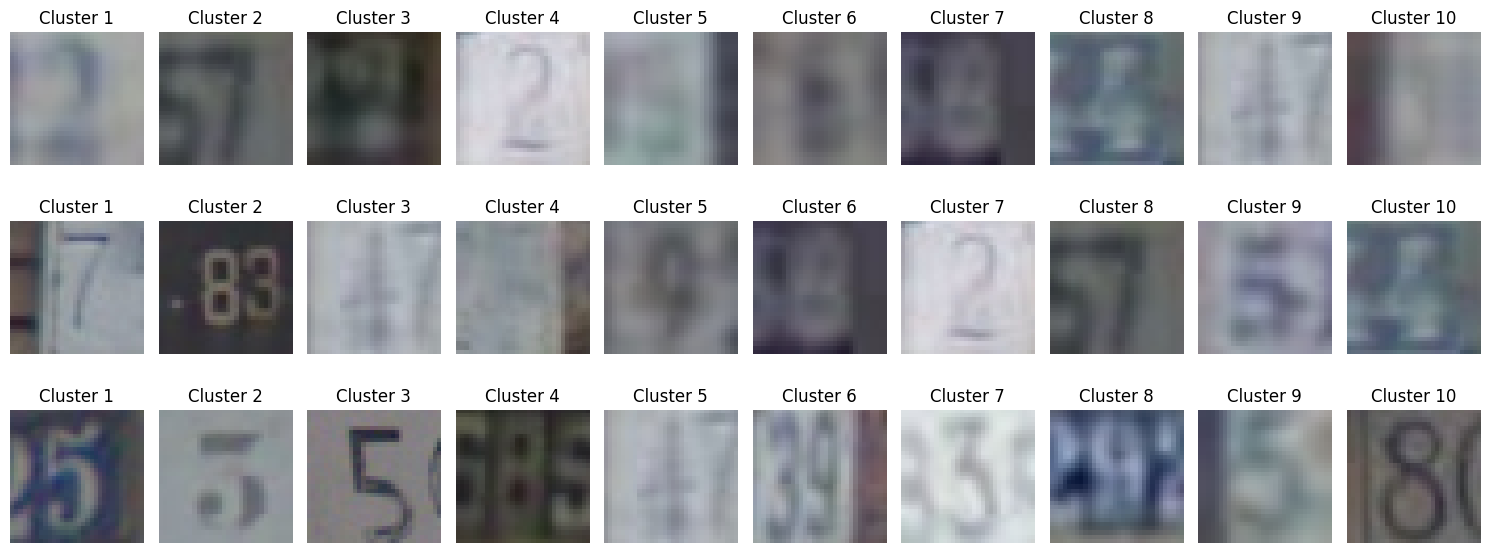

In [40]:
fig, axes = plt.subplots(3, 10, figsize=(15, 6))

for i, indices in enumerate([closest_indices_raw, closest_indices_pca_27, closest_indices_pca_10]):
    for j, idx in enumerate(indices):
        axes[i, j].imshow(x_train[idx].reshape(32, 32, 3))
        axes[i, j].axis('off')
        axes[i, j].set_title(f'Cluster {j+1}')

plt.tight_layout()
plt.show()

2b

In [41]:
from sklearn.metrics import adjusted_rand_score, completeness_score, homogeneity_score, v_measure_score


In [42]:
def evaluate_clusters(true_labels, cluster_labels):
    purity = completeness_score(true_labels, cluster_labels)
    rand_index = adjusted_rand_score(true_labels, cluster_labels)
    return purity, rand_index

In [43]:
purity_raw, rand_index_raw = evaluate_clusters(y_train, labels_raw)

purity_pca_27, rand_index_pca_27 = evaluate_clusters(y_train, labels_10_pca_27)

purity_pca_10, rand_index_pca_10 = evaluate_clusters(y_train, labels_10_pca_10)

# Print the results
print(f'Purity and Rand-Index for k-means clustering on raw data:')
print(f'Purity: {purity_raw:.4f}, Rand-Index: {rand_index_raw:.4f}')

print(f'Purity and Rand-Index for k-means clustering on PCA data (dimension as found in part 1a):')
print(f'Purity: {purity_pca_27:.4f}, Rand-Index: {rand_index_pca_27:.4f}')

print(f'Purity and Rand-Index for k-means clustering on PCA data (dimension 10):')
print(f'Purity: {purity_pca_10:.4f}, Rand-Index: {rand_index_pca_10:.4f}')


Purity and Rand-Index for k-means clustering on raw data:
Purity: 0.0035, Rand-Index: 0.0006
Purity and Rand-Index for k-means clustering on PCA data (dimension as found in part 1a):
Purity: 0.0034, Rand-Index: 0.0006
Purity and Rand-Index for k-means clustering on PCA data (dimension 10):
Purity: 0.0034, Rand-Index: 0.0006


2c

In [44]:
from collections import Counter

# Label clusters with the most frequent digit in each cluster
def label_clusters_with_most_frequent_digit(cluster_labels, true_labels):
    cluster_digit_mapping = {}
    for cluster_label in np.unique(cluster_labels):
        indices = np.where(cluster_labels == cluster_label)[0]
        digit_counts = Counter(true_labels[indices])
        most_frequent_digit = digit_counts.most_common(1)[0][0]
        cluster_digit_mapping[cluster_label] = most_frequent_digit
    return cluster_digit_mapping

# Label clusters
cluster_digit_mapping_raw = label_clusters_with_most_frequent_digit(labels_raw, y_train)
cluster_digit_mapping_pca_27 = label_clusters_with_most_frequent_digit(labels_10_pca_27, y_train)
cluster_digit_mapping_pca_10 = label_clusters_with_most_frequent_digit(labels_10_pca_10, y_train)

# Predict cluster labels for test data
test_labels_pred_raw = [cluster_digit_mapping_raw[label] for label in kmeans_raw.predict(x_test_std)]
test_labels_pred_pca_27 = [cluster_digit_mapping_pca_27[label] for label in kmeans_10_pca_27.predict(x_test_pca_27)]
test_labels_pred_pca_10 = [cluster_digit_mapping_pca_10[label] for label in kmeans_10_pca_10.predict(x_test_pca_10)]

# Calculate classification accuracy
accuracy_raw = accuracy_score(y_test, test_labels_pred_raw)
accuracy_pca_27 = accuracy_score(y_test, test_labels_pred_pca_27)
accuracy_pca_10 = accuracy_score(y_test, test_labels_pred_pca_10)

print("Classification accuracy using unsupervised method for k-means clustering on raw data:", accuracy_raw)
print("Classification accuracy using unsupervised method for k-means clustering on PCA data (dimension as found in part 1a):", accuracy_pca_27)
print("Classification accuracy using unsupervised method for k-means clustering on PCA data (dimension 10):", accuracy_pca_10)


Classification accuracy using unsupervised method for k-means clustering on raw data: 0.09015826674861709
Classification accuracy using unsupervised method for k-means clustering on PCA data (dimension as found in part 1a): 0.08074677320221266
Classification accuracy using unsupervised method for k-means clustering on PCA data (dimension 10): 0.09722649047326368


2d

In [45]:
# Perform k-means clustering with k=5 on data obtained after PCA dimensionality reduction (num_components)
kmeans_pca_5 = KMeans(n_clusters=5, random_state=42)
kmeans_pca_5.fit(x_train_pca_27)

# Calculate sum squared error for k-means clustering with k=5
sse_pca_5 = kmeans_pca_5.inertia_
print("Sum squared error for k-means clustering with k=5 on data obtained after PCA ({} components):".format(27), sse_pca_5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sum squared error for k-means clustering with k=5 on data obtained after PCA (27 components): 27885259.59579233
